Importando librerias

In [1]:
  import numpy as np  
import pandas as pd
import re  
import nltk  
from sklearn.datasets import load_files
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from google.colab import files
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


Cargando los datos

In [4]:
nltk.download('stopwords')
upload = files.upload()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Saving ticket_data.csv to ticket_data (1).csv


Obteniendo el dataframe

In [6]:
data = pd.read_csv('ticket_data.csv')
data.head(5)

,Description,Category
0,hi since recruiter lead permission approve req...,CatetgoryD
1,re expire days hi ask help update passwords co...,CatetgoryD
2,verification warning hi has got attached pleas...,CatetgoryD
3,please dear looks blacklisted receiving mails ...,CatetgoryD
4,dear modules report report cost thank much reg...,CatetgoryD


Creamos la columna 'target' a partir de la columna categoría del dataset

In [7]:
data['target'] = data.Category.astype('category').cat.codes

Hacemos drop de la columna 'category' ya que la sustituímos por la columna target

In [8]:
data.drop('Category', axis = 1, inplace=True)
data.head()

,Description,target
0,hi since recruiter lead permission approve req...,4
1,re expire days hi ask help update passwords co...,4
2,verification warning hi has got attached pleas...,4
3,please dear looks blacklisted receiving mails ...,4
4,dear modules report report cost thank much reg...,4


Vamos a utilizar la descripción de los tickets para obtener la clasificación de los mismos

In [11]:
x = data['Description']
y = data['target']

Generamos nuestros conjuntos de entrenamiento y pruebas

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Vamos a contar las veces que aparece una palabra en nuestras descripciones

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=stopwords.words('english'))
X_1 = vectorizer.fit_transform(x_train)

Utilizamos TF-IDF para obtener que tan importante es una palabra en la descripción

In [18]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_1)

Entrenamos nuestro Naive Bayes

In [19]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_tfidf, y_train)

Creamos un pipeline con los pasos previamente vistos (CountVectorizer, TfidfTransformer, Naive Bayes)

In [26]:
from sklearn.pipeline import Pipeline
text_clf_mnb = Pipeline([('vect', CountVectorizer(ngram_range=(1,2),stop_words=stopwords.words('english'))), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB()),])
text_clf_mnb.fit(x, y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",...
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itse

Creamos una función para mostrar la matriz de confusión

In [29]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=30)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=22)
    plt.yticks(tick_marks, classes, fontsize=22)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label', fontsize=25)
    plt.xlabel('Predicted label', fontsize=25)

Probamos el rendimiento de nuestro modelo usando la métrica de accuracy (Multinomial Naive Bayes)


In [27]:
from sklearn.metrics import accuracy_score

text_clf_mnb_pred = text_clf_mnb.predict(x_test)
acc = accuracy_score(y_test, text_clf_mnb_pred)
acc

0.9216666666666666

Mostremos nuestra matriz de confusión (Multinomial Naive Bayes)

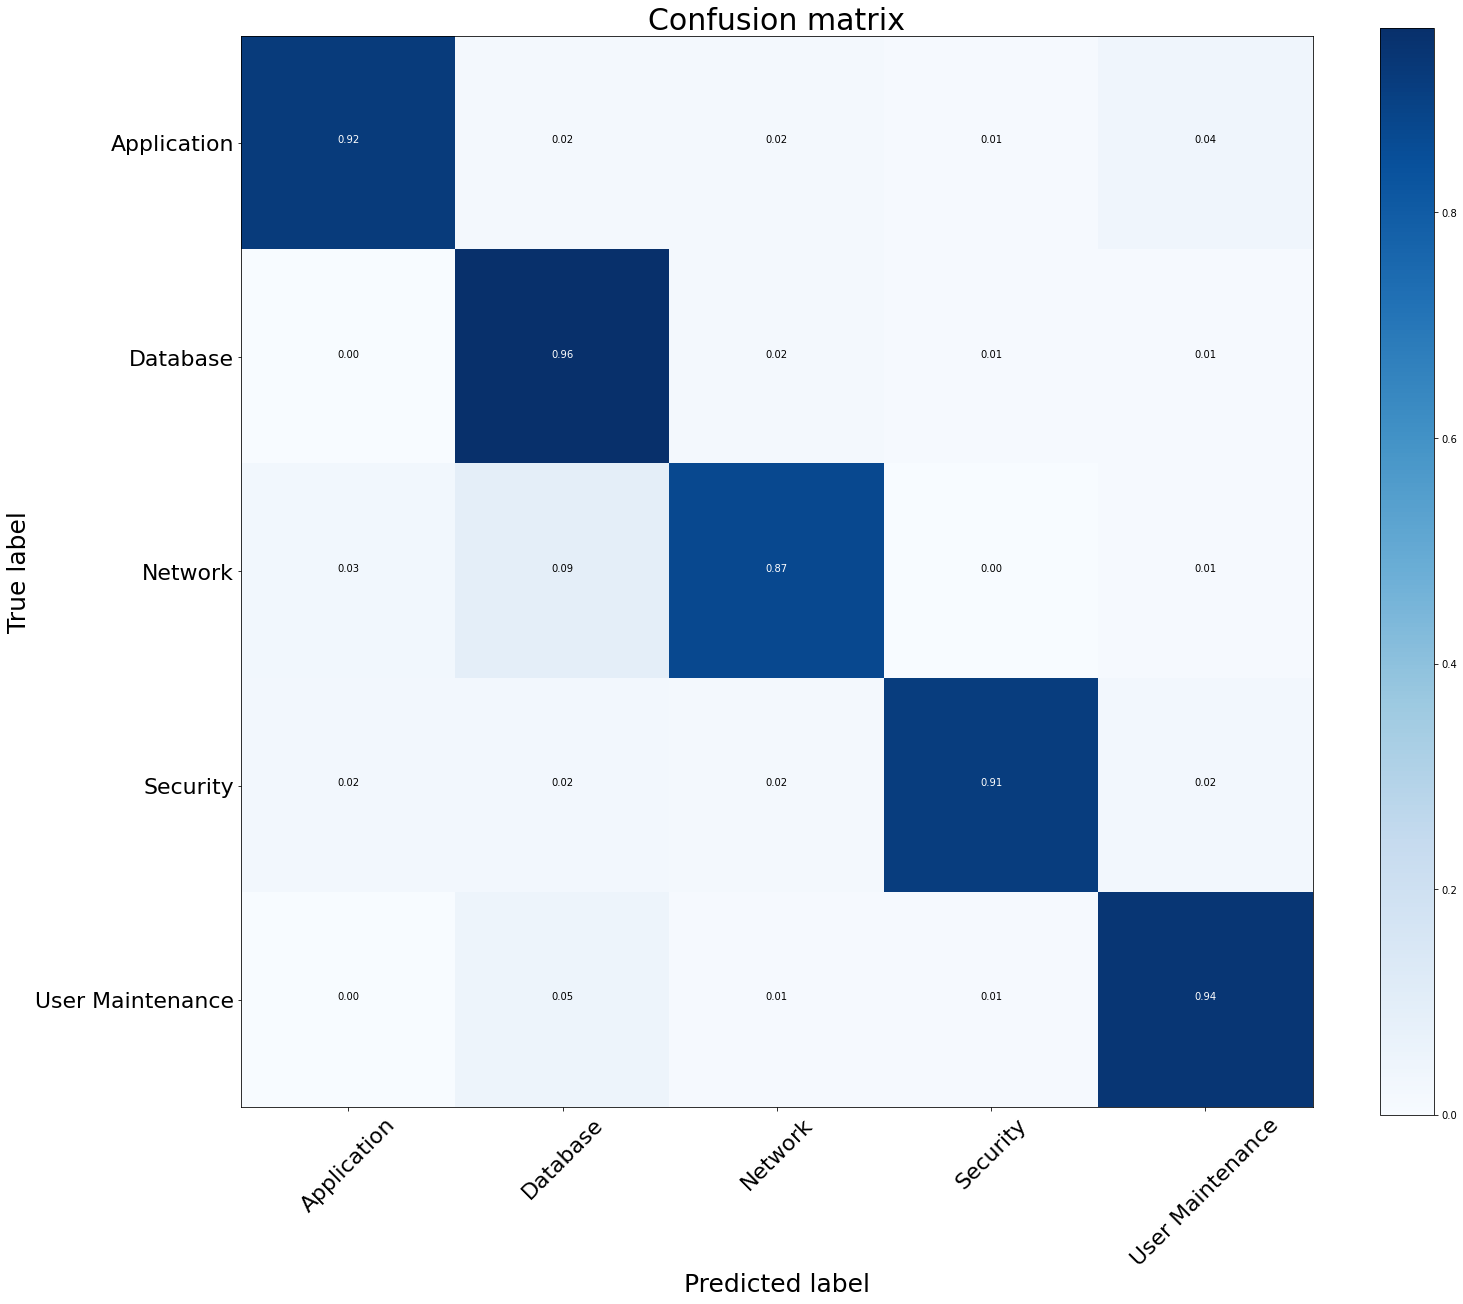

In [39]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools

encoder = LabelEncoder()
encoder.fit(['Application', 'Database', 'Network', 'Security', 'User Maintenance'])
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, pred)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

Utilicemos ahora un clasificador basado en SVM

In [35]:
from sklearn.linear_model import SGDClassifier
text_clf_svm = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                         ('clf-svm', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=50, random_state=42))])
text_clf_svm.fit(x, y)

Pipeline(memory=None,
         steps=[('vect',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=Non...
                ('clf-svm',
                 SGDClassifier(alpha=0.001, average=False, class_weight=None,
                               early_stopping=False, epsilon=0.1, eta0=0.0,
                               fit_intercept=True, l1_ratio=0.15,
                               learning_rate='optimal', loss='hinge',
                  

Probamos el rendimiento de nuestro modelo usando la métrica de accuracy (Multinomial Naive Bayes)

In [36]:
from sklearn.metrics import accuracy_score

text_clf_svm_pred = text_clf_svm.predict(x_test)
acc = accuracy_score(y_test, text_clf_svm_pred)
acc

0.8466666666666667

Mostremos nuestra matriz de confusión (SVM)

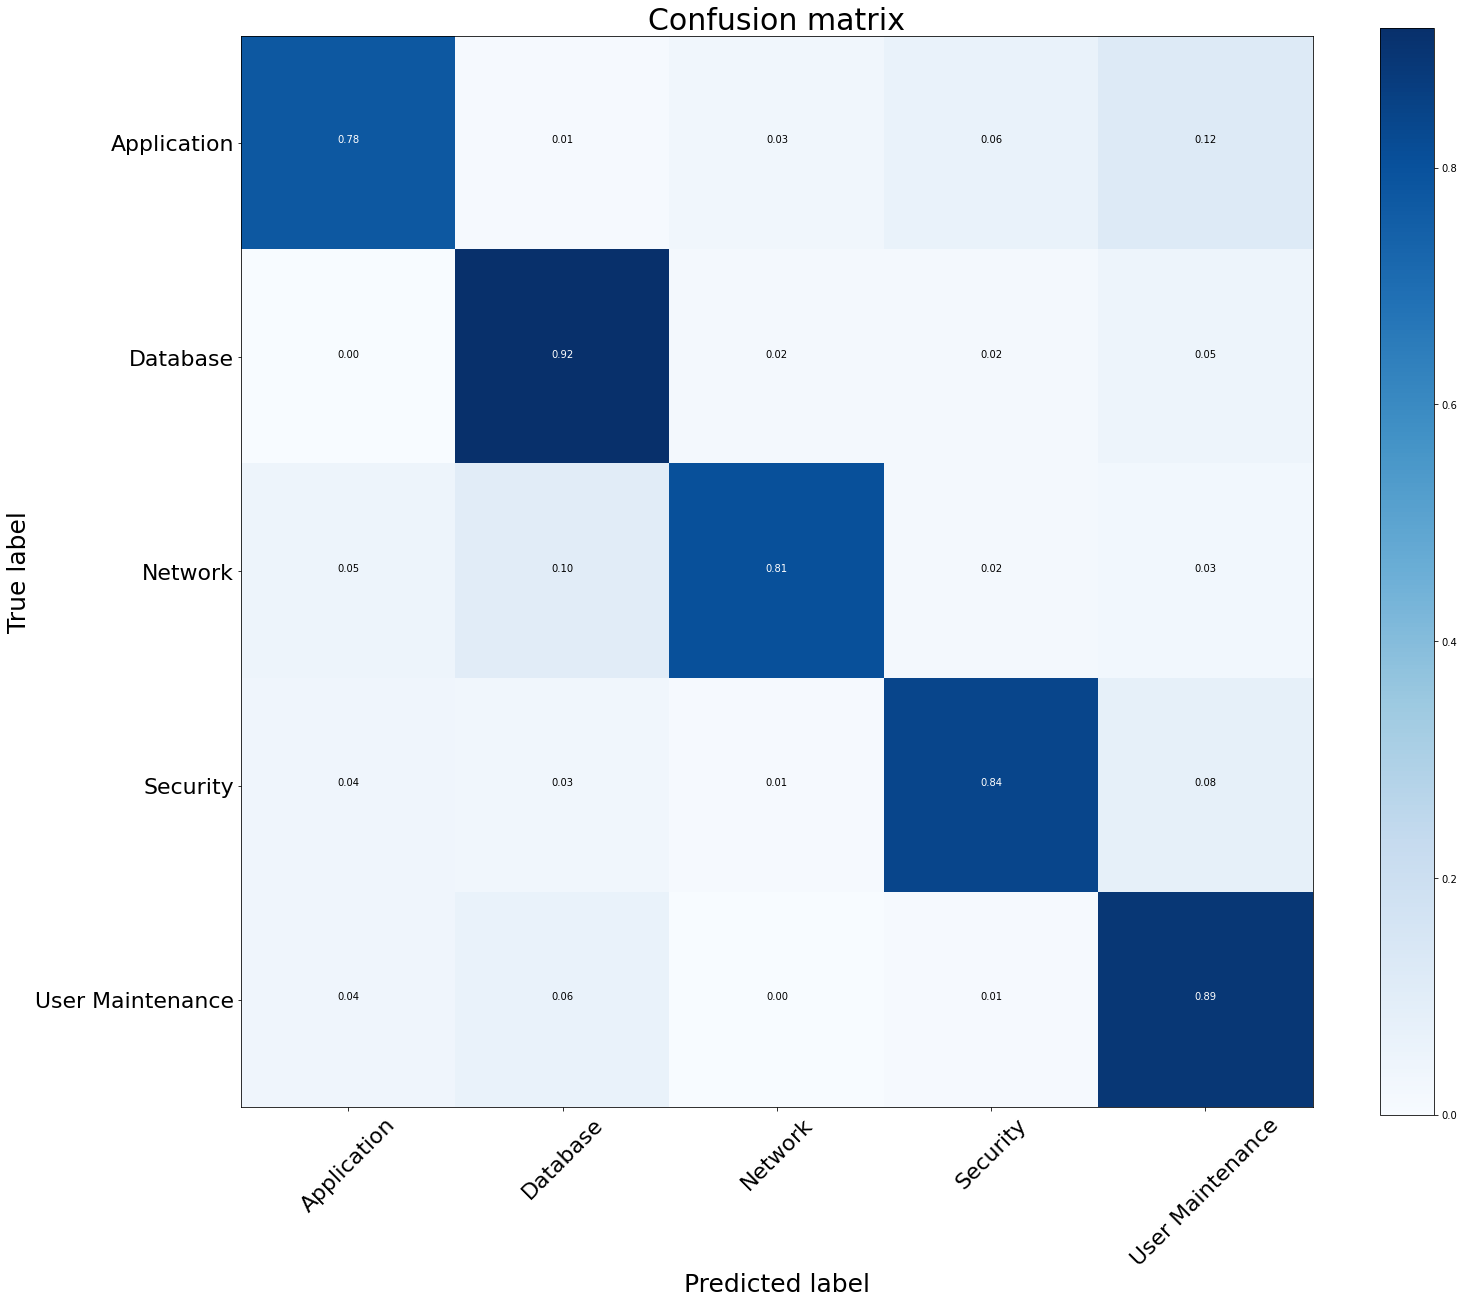

In [38]:
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix
import itertools

encoder = LabelEncoder()
encoder.fit(['Application', 'Database', 'Network', 'Security', 'User Maintenance'])
text_labels = encoder.classes_ 
cnf_matrix = confusion_matrix(y_test, text_clf_svm_pred)
plt.figure(figsize=(24,20))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

Utilicemos ahora un clasificador basado en 